In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import time

In [2]:
# 給csv檔目錄路徑
path = "csv3s/"

# 用glob將路徑內的.csv檔全部抓出來
all_files = glob(os.path.join(path, "*.csv"))

# 合併所有csv檔
# 一個一個將all_files裡的csv檔讀進來，不留index，並用逗號隔開[1csv,2csv,3csv,....]，才能用concat語法
df_from_each_file = (pd.read_csv(f, sep=',', index_col=0) for f in all_files) 
df = pd.concat(df_from_each_file, ignore_index=True) # 將所有讀進來的csv檔合併，並忽略index

# 檢查一下df
df

,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,chroma_cq_var,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,blues1-1-0.wav,92.285156,154,51.333333,0.385921,0.329183,0.108361,0.359351,0.287664,0.082751,...,0.032553,-0.000010,0.051346,0.002636,0.000006,0.042748,0.001827,1.532517,0.929153,0.863325
1,blues1-1-1.wav,117.453835,259,51.800000,0.406119,0.292756,0.085706,0.529980,0.230604,0.053178,...,0.002770,-0.000050,0.130584,0.017052,0.000072,0.104580,0.010937,1.583055,0.919575,0.845618
2,blues1-1-2.wav,123.046875,70,23.333333,0.419712,0.293514,0.086150,0.515283,0.244956,0.060003,...,0.003773,0.000092,0.130141,0.016937,-0.000071,0.097512,0.009509,1.425447,0.869471,0.755979
3,blues1-1-3.wav,123.046875,232,46.400000,0.372463,0.298041,0.088828,0.464383,0.256593,0.065840,...,0.005605,-0.000006,0.131611,0.017322,-0.000149,0.099613,0.009923,1.503834,0.835938,0.698793
4,blues1-1-4.wav,117.453835,190,47.500000,0.410708,0.288858,0.083439,0.527301,0.244868,0.059960,...,0.003175,-0.000002,0.113766,0.012943,0.000032,0.098527,0.009708,1.486077,0.863520,0.745667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,rock9-7-5.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
36476,rock9-7-6.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
36477,rock9-7-7.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
36478,rock9-7-8.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [4]:
# 從song_name欄位的字串中，用0-9數字分割字串，並取分割後的第一個字串，ex:blues1-1-1.wav -> blues，丟給新欄位label
df['label'] = df['song_name'].str.split("[0-9]").str.get(0)  
# 匯出完整csv檔
df.to_csv( "allmusic3s.csv")

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [6]:
# 讀取完整csv檔
df_3s = pd.read_csv('allmusic3s.csv', index_col=0)
df_3s

,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,chroma_cq_var,...,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var,label
0,blues1-1-0.wav,92.285156,154,51.333333,0.385921,0.329183,0.108361,0.359351,0.287664,0.082751,...,-0.000010,0.051346,0.002636,0.000006,0.042748,0.001827,1.532517,0.929153,0.863325,blues
1,blues1-1-1.wav,117.453835,259,51.800000,0.406119,0.292756,0.085706,0.529980,0.230604,0.053178,...,-0.000050,0.130584,0.017052,0.000072,0.104580,0.010937,1.583055,0.919575,0.845618,blues
2,blues1-1-2.wav,123.046875,70,23.333333,0.419712,0.293514,0.086150,0.515283,0.244956,0.060003,...,0.000092,0.130141,0.016937,-0.000071,0.097512,0.009509,1.425447,0.869471,0.755979,blues
3,blues1-1-3.wav,123.046875,232,46.400000,0.372463,0.298041,0.088828,0.464383,0.256593,0.065840,...,-0.000006,0.131611,0.017322,-0.000149,0.099613,0.009923,1.503834,0.835938,0.698793,blues
4,blues1-1-4.wav,117.453835,190,47.500000,0.410708,0.288858,0.083439,0.527301,0.244868,0.059960,...,-0.000002,0.113766,0.012943,0.000032,0.098527,0.009708,1.486077,0.863520,0.745667,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,rock9-7-5.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,rock
36476,rock9-7-6.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,rock
36477,rock9-7-7.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,rock
36478,rock9-7-8.wav,0.000000,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,rock


In [7]:
# 檢查空值
df_3s.isnull().sum().sort_values(ascending = False)

average_beats    51
frame_var        39
frame_std        39
frame_mean       39
song_name         0
                 ..
mfcc4_var         0
mfcc5_var         0
mfcc6_var         0
mfcc7_var         0
label             0
Length: 170, dtype: int64

In [9]:
df_3s = df_3s.dropna()
df_3s.isnull().sum().sort_values(ascending = False)

song_name           0
mfcc1_delta_var     0
mfcc13_delta_std    0
mfcc14_delta_std    0
mfcc15_delta_std    0
                   ..
mfcc3_var           0
mfcc4_var           0
mfcc5_var           0
mfcc6_var           0
label               0
Length: 170, dtype: int64

In [10]:
# 將label字串轉成數字的類別0-9
df_3s['label']=df_3s['label'].replace(['blues','classical','country','disco','hiphop','jazz','metal','pop'
,'reggae','rock'],[0,1,2,3,4,5,6,7,8,9])

In [21]:
# 將song_name欄位丟掉
df_3s = df_3s.drop(['song_name'], axis=1)
# 確定剩下數字資料型態
df_3s.dtypes

tempo               float64
total_beats           int64
average_beats       float64
chroma_stft_mean    float64
chroma_stft_std     float64
                     ...   
perc_var            float64
frame_mean          float64
frame_std           float64
frame_var           float64
label                 int64
Length: 169, dtype: object

In [22]:
# 分成特徵欄位及預測目標欄位
y = df_3s['label']
X = df_3s.loc[:, df_3s.columns != 'label'] # label以外的欄位

#### NORMALIZE X ####

# 對特徵值做標準化
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# 新dataframe用標準化過的特徵值
X = pd.DataFrame(np_scaled, columns = cols)

In [23]:
# 切成訓練集合測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
y_test

19217    5
8655     2
11889    3
12184    3
31968    9
        ..
34955    9
13838    3
36317    9
10805    2
17302    5
Name: label, Length: 10929, dtype: int64

In [25]:
X_train

,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,chroma_cq_var,chroma_cens_mean,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
19587,0.376093,0.387660,0.478519,0.429523,0.686030,0.556459,0.529799,0.631607,0.504423,0.849959,...,0.009792,0.846440,0.135189,0.018276,0.682709,0.119858,0.014369,0.462604,0.585341,0.342624
13681,0.425349,0.423749,0.524444,0.504971,0.700845,0.574721,0.815207,0.315975,0.197834,0.975958,...,0.095013,0.846611,0.130732,0.017091,0.679273,0.341173,0.116405,0.454294,0.647763,0.419597
23562,0.486194,0.473807,0.501587,0.196883,0.588702,0.443045,0.314142,0.590846,0.458705,0.738189,...,0.009366,0.846977,0.361708,0.130833,0.684071,0.221770,0.049187,0.463573,0.622246,0.387190
18308,0.399490,0.358556,0.533333,0.280790,0.722067,0.601342,0.279119,0.816342,0.734390,0.557618,...,0.002142,0.846653,0.083305,0.006940,0.683547,0.035450,0.001258,0.371191,0.602370,0.362850
29661,0.454082,0.420256,0.627556,0.463196,0.761322,0.652012,0.411333,0.684426,0.566366,0.761004,...,0.041309,0.846754,0.259464,0.067322,0.680913,0.231001,0.053366,0.475900,0.622872,0.387969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.522321,0.377183,0.465185,0.225717,0.711131,0.587557,0.288690,0.768023,0.670637,0.614755,...,0.015482,0.847050,0.368176,0.135554,0.686630,0.326735,0.106762,0.466066,0.652904,0.426284
6265,0.399490,0.267753,0.394667,0.281582,0.699098,0.572554,0.368895,0.731880,0.624619,0.649099,...,0.002616,0.848298,0.038573,0.001488,0.686582,0.009729,0.000095,0.417867,0.512891,0.263057
11284,0.563265,0.538999,0.498889,0.408821,0.699294,0.572797,0.315211,0.672194,0.551750,0.691630,...,0.070413,0.846218,0.313884,0.098523,0.692568,0.289019,0.083538,0.482548,0.585410,0.342705
860,0.486194,0.483120,0.511746,0.421276,0.757031,0.646383,0.459604,0.864724,0.800783,0.729312,...,0.033501,0.846630,0.230927,0.053327,0.685379,0.276390,0.076397,0.484765,0.611290,0.373675


In [26]:
# 定義執行模型的函數，才不用多打很多次
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)   # 訓練模型
    preds = model.predict(X_test)  # 測試模型
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')  # print出模型準確率

In [27]:
start = time.perf_counter()

# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")


print("This time is being calculated")

end = time.perf_counter()  #結束時間

print(end - start) # 計算時長

Accuracy Naive Bayes : 0.53893 

Accuracy Stochastic Gradient Descent : 0.69448 

Accuracy KNN : 0.79696 

Accuracy Decission trees : 0.64233 

Accuracy Random Forest : 0.73127 

Accuracy Support Vector Machine : 0.76164 

Accuracy Logistic Regression : 0.71534 

Accuracy Neural Nets : 0.66145 

Accuracy Cross Gradient Booster : 0.90585 

Accuracy Cross Gradient Booster (Random Forest) : 0.71617 



Accuracy : 0.90585 



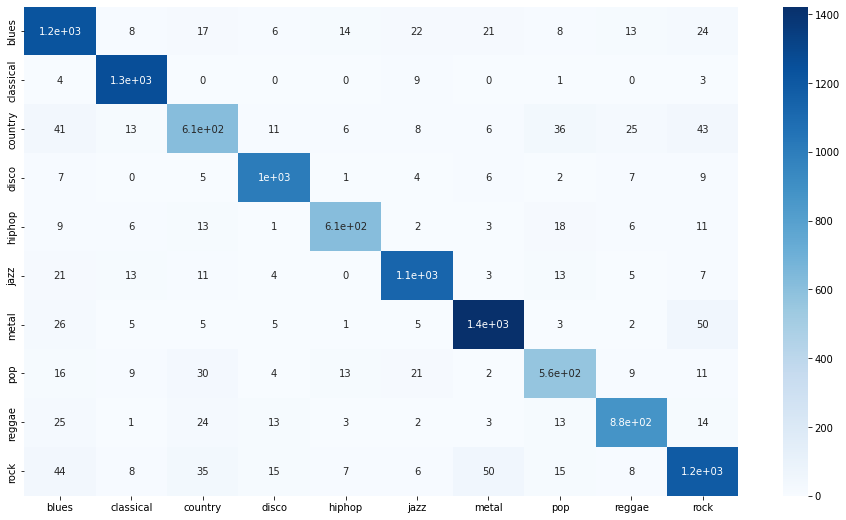

In [28]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
# plt.savefig("conf matrix")

In [29]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0544 ± 0.0028,perc_std
0.0378 ± 0.0012,mfcc4_mean
0.0305 ± 0.0025,mfcc1_delta_std
0.0273 ± 0.0027,melspectrogram_std
0.0255 ± 0.0020,mfcc3_mean
0.0240 ± 0.0022,rmse_std
0.0235 ± 0.0018,tempo
0.0179 ± 0.0034,contrast_mean
0.0148 ± 0.0013,contrast_std
0.0145 ± 0.0017,mfcc6_mean
